# Adding and removing Graph, Node, and Edge Attributes

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary

# Import NetworkX Module

In [1]:
import networkx as nx

# Creating an empty graph

In [2]:
G = nx.Graph()

# Adding Nodes

In [3]:
# Adds a single node with title passed into the method
G.add_node(1)

In [4]:
# adds a tuple of Nodes in a list with the titles passed into the method
G.add_nodes_from([2, 3])

# Adding Edges

In [5]:
# edges connect nodes. The following draws a line from node 1 to node 2
G.add_edge(1, 2)

In [6]:
# Edges can be stored as a variable, and passed to the add_edge method with args
e = (2, 3)
G.add_edge(*e)

In [7]:
# edges can be drawn many at a tuple if they are passed in as a list of tuples
G.add_edges_from([(1, 2), (1, 3)])

# View Nodes

In [8]:
G.number_of_nodes()

3

# View Edges

In [9]:
G.number_of_edges()

3

# More Details

In [10]:
# Show all nodes
G.nodes()

NodeView((1, 2, 3))

In [11]:
# show all edges
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [12]:
# Show relationships
G.neighbors(1)

## Drawing Graphs

In [13]:
import matplotlib.pyplot as plt

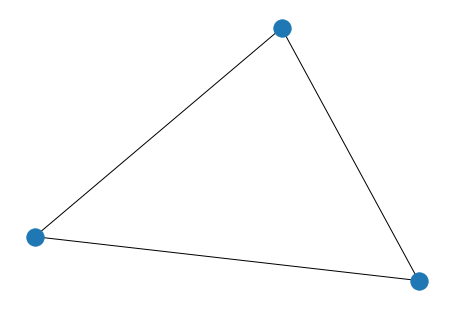

In [14]:
nx.draw(G)

In [15]:
plt.show()

In [16]:
# You can add more nodes after initially drawing
G.add_node('node4')

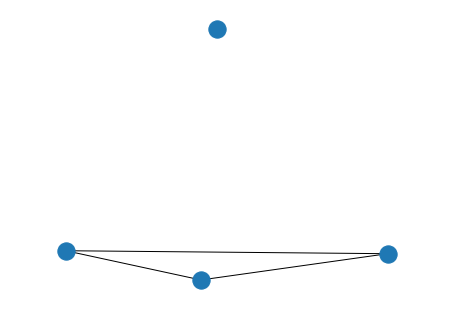

In [17]:
nx.draw(G)
plt.show()

In [18]:
# draw two new edges to the newly added node
G.add_edges_from([(2, 'node4'), (3, 'node4')])

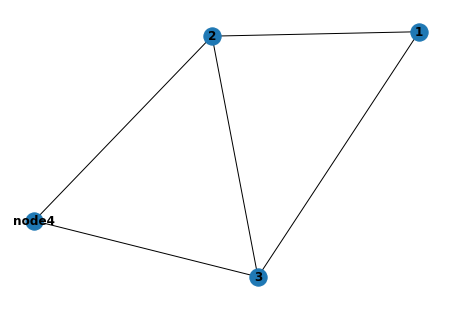

In [19]:
# adds labels
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [20]:
# Assign graph attributes when creating a new graph
G = nx.Graph(days='Friday', name='My Graph')
G.graph # Access to the dictionaruy that stores graph attrs

{'days': 'Friday', 'name': 'My Graph'}

In [21]:
# Or you can modify attributes later
G.graph['day'] = 'Monday'
G.graph

{'days': 'Friday', 'name': 'My Graph', 'day': 'Monday'}

Node Attributes

In order to add node attributes you can use the methods G.add_node and G.add_nodes_from, or the node attribute dictionary G.nodes

In [22]:
# Adds a point on the graph
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm') # multiple nodes
G.nodes[1]['room'] = 714 # add a new attribute to the graph dictionary 

Adding a node that is already in the graph does not raise an error, you can add new attributes to an existing node by adding it again with a new attribute:

In [23]:
G.add_node(3, room=715)

In order to access node attribute information you can:

In [24]:
# Access the value of the attribute
G.nodes[1]['time']

'5pm'

In [25]:
# Access the attribute dictionary
G.nodes[1]

{'time': '5pm', 'room': 714}

In practice it's usually more useful to iterate over nodes with their attributes

In [26]:
# Nodes without attributes
list(G.nodes())

[1, 3]

In [27]:
# Tuples of node and attribute dictionary
list(G.nodes(data=True))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm', 'room': 715})]

In [28]:
# In NetworkX version 2.0 you can also directly specify the node attribute in the data keyword
if nx.__version__.startswith('2'):
    print(list(G.nodes(data='room')))

[(1, 714), (3, 715)]


In [29]:
# You can set attributes in the following syntax: (graph, values, name)
nx.set_node_attributes(G, {1: 'A', 3: 'C'}, 'grades')
nx.set_node_attributes(G, 2017, 'year')

Retrieving node attributes

In [30]:
nx.get_node_attributes(G, 'time')

{1: '5pm', 3: '2pm'}

In [31]:
nx.get_node_attributes(G, 'grades')

{1: 'A', 3: 'C'}

In [32]:
nx.get_node_attributes(G, 'year')

{1: 2017, 3: 2017}

### Edge Attributes

In order to add edge attributes you can use the methods G.add_edge and G.add_edges_from; the edge attribute dictionary G.edge or subscript notation

In [33]:
G.add_edge(1, 2, weight=4.0)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
# When an edge is already added you can use subscript notation or update the edge attribute dictionary
G[1][2]['weight'] = 4.0

In [34]:
# Adding attributes to an existing edge does not raise an error; edges CAN be added again
G.add_edge(3, 4, weight=12)

In [35]:
# access the value of attribute weight
G[1][2]['weight']

4.0

In [36]:
# Attribute dictionary for edge 1.2
G[1][2]

{'weight': 4.0, 'color': 'blue'}

In [37]:
# Edges without attributes
list(G.edges())

[(1, 2), (3, 4), (3, 2), (4, 5)]

In [38]:
# Edges as tuples of nodes and edge attributes
list(G.edges(data=True))

[(1, 2, {'weight': 4.0, 'color': 'blue'}),
 (3, 4, {'color': 'red', 'weight': 12}),
 (3, 2, {'weight': 8}),
 (4, 5, {'color': 'red'})]

In [39]:
if nx.__version__.startswith('2'):
    print(list(G.edges(data='weight')))

[(1, 2, 4.0), (3, 4, 12), (3, 2, 8), (4, 5, None)]


In [40]:
# You can also set edge attributes using the function through networkx
# the syntax is (graph, values, name)
nx.set_edge_attributes(G, 1, 'capacity')

In [41]:
nx.set_edge_attributes(G, {(1, 2): True, (2, 3): False, (3, 4): False, (4, 5): True}, 'friendship')

In [42]:
# You can retrieve edge attributes similarly from nx as you can with G
nx.get_edge_attributes(G, 'friendship')

{(1, 2): True, (3, 4): False, (3, 2): False, (4, 5): True}

In [43]:
# print's a graph's information
print(nx.info(G))

Name: My Graph
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


Now we'll see a general vieiw of NetworkX plottitng capabilities, and later we'll also use some plots to highlight some of the more complex network analysis.

# Social Network Analysis

In [44]:
G = nx.florentine_families_graph() # example graph provided by NetworkX

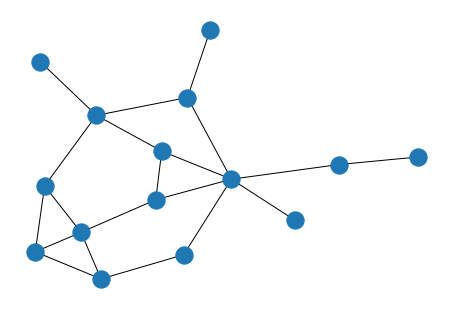

In [45]:
# The function nx.draw is the main entry point for NetworkX plotting functions
nx.draw(G)

By default, the layout (that is the position of the nodes in the 2D plane) used is the spring layout. NetworkX, expecially in the upcoming 2.0 version, has some more interesting layout algorithms. We can precompute the layout for a given graph and then pass it to the nx.draw function

In [46]:
pos_spring = nx.spring_layout(G)
pos_fr = nx.fruchterman_reingold_layout(G)
pos_fr

{'Acciaiuoli': array([-0.13512462,  0.39210834]),
 'Medici': array([0.04327212, 0.08766841]),
 'Castellani': array([ 0.09873148, -0.85386057]),
 'Peruzzi': array([ 0.25251417, -0.66484828]),
 'Strozzi': array([ 0.01579545, -0.61681642]),
 'Barbadori': array([ 0.02573794, -0.44160491]),
 'Ridolfi': array([-0.1979224 , -0.27361447]),
 'Tornabuoni': array([-0.31755275, -0.03280047]),
 'Albizzi': array([-0.11360719,  0.56623804]),
 'Salviati': array([0.58294689, 0.24519806]),
 'Pazzi': array([0.98529375, 0.34166665]),
 'Bischeri': array([ 0.01251269, -0.27286323]),
 'Guadagni': array([-0.36188258,  0.18832947]),
 'Ginori': array([-0.10263735,  1.        ]),
 'Lamberteschi': array([-0.7880776,  0.3351994])}

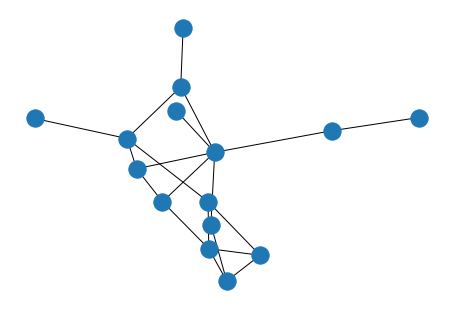

In [47]:
# You can pass layouts into the nx.draw() function with the G
nx.draw(G, pos=pos_fr)

We can also control the size and color of the nodes, the width of the edges, the lbaels of the nodes and their fonts via kwargs of nx.draw

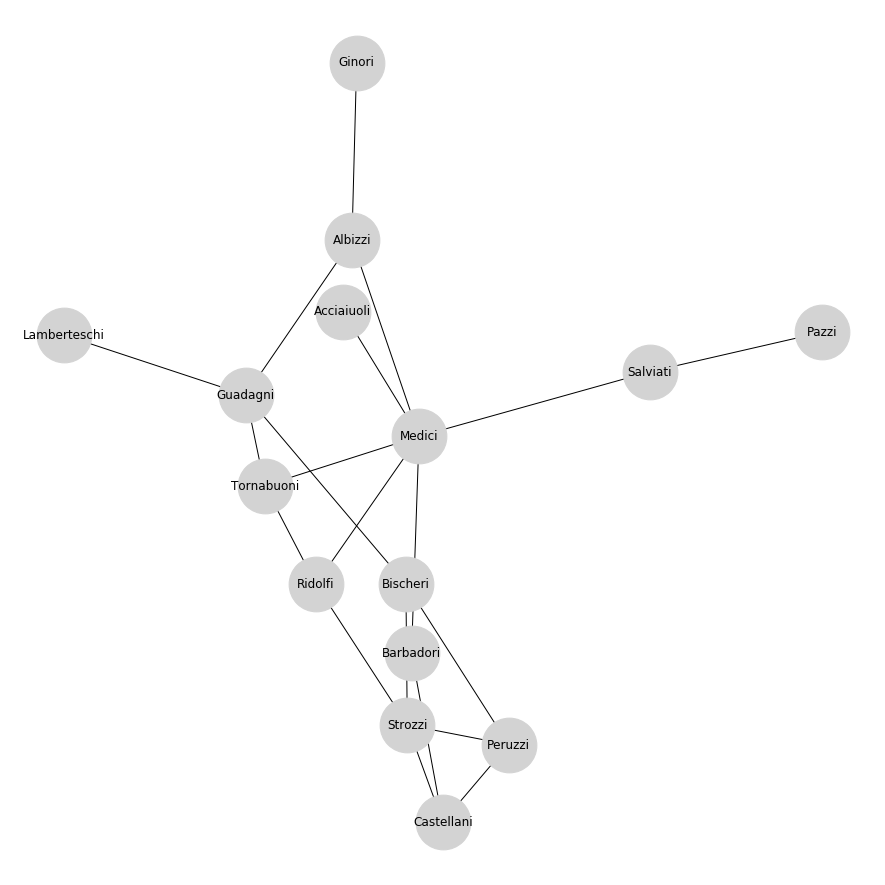

In [48]:
plt.figure(figsize=(12, 12))
nx.draw(G, pos=pos_fr, node_size=3000, node_color='lightgrey', with_labels=True)

If we want to plot more complex plots, for instance, plot nodes of different colors and sizes, add labels to only some nodes, add edge labels, etc ... We have to use more specialize plot functions such as:

    * nx.draw_networkx_nodes
    * nx.draw_networkx_edges
    * nx.draw_networkx_labels
    * nx.draw_networkx_edge_labels

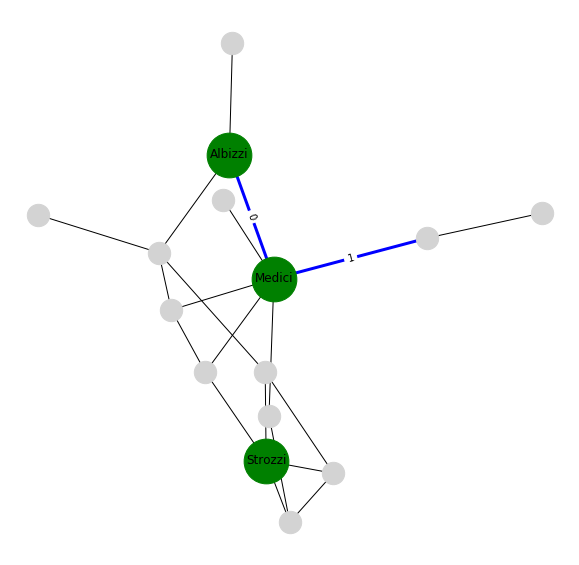

In [49]:
plt.figure(figsize=(10, 10))
big_and_green_nodes = {'Medici', 'Albizzi', 'Strozzi'}
other_nodes = set(G) - big_and_green_nodes
thick_edges = {('Medici', 'Albizzi'), ('Medici', 'Salviati')}
other_edges = set(G.edges()) - thick_edges
# Plot nodes
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=big_and_green_nodes, node_size=2000, node_color='green')
nx.draw_networkx_nodes(G, pos=pos_fr, nodelist=other_nodes, node_size=500, node_color='lightgrey')
# Plot edges
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=thick_edges, width=3, edge_color='blue')
nx.draw_networkx_edges(G, pos=pos_fr, edgelist=other_edges)
# Plot node labels
nx.draw_networkx_labels(G, pos=pos_fr, labels={n: n for n in big_and_green_nodes})
# Plot edge labels
nx.draw_networkx_edge_labels(G, pos=pos_fr, edge_labels={e: i for i, e in enumerate(thick_edges)})
# Remove axes
ax = plt.gca()
ax.set_axis_off()

# Network Analysis

#### Undirected Graphs

{0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 1}

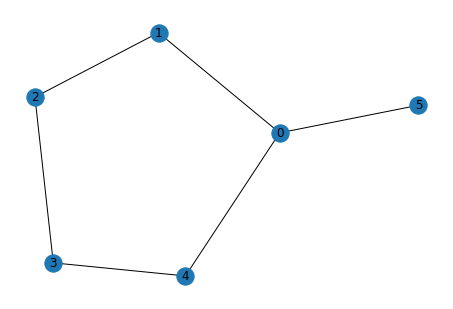

In [50]:
G = nx.cycle_graph(5)
G.add_edge(0, 5)
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), with_labels=True)
dict(G.degree())

In [51]:
# You can also get degree for a single node
G.degree(5)

1

In [53]:
max(G, key=G.degree)

0

In [55]:
# we can get the nieghbors of node 0
list(G.neighbors(0))

[1, 4, 5]

In [56]:
# We can also access the neighbors, along with the dge labels (empty in this example)
# using the subscript notation
G[0]

AtlasView({1: {}, 4: {}, 5: {}})

#### Directed Graphs

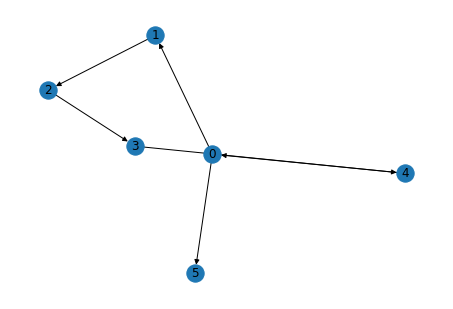

In [57]:
D = nx.cycle_graph(5, create_using=nx.DiGraph())
D.add_edge(0, 5)
nx.draw(D, pos=nx.fruchterman_reingold_layout(D), with_labels=True)

{(0, 1): Text(0.852878,0.122031,'1'),
 (0, 4): Text(0.311731,-0.877703,'2'),
 (1, 2): Text(0.134383,0.947163,'3'),
 (2, 3): Text(-0.672301,0.377969,'4'),
 (3, 4): Text(-0.62669,-0.56946,'5')}

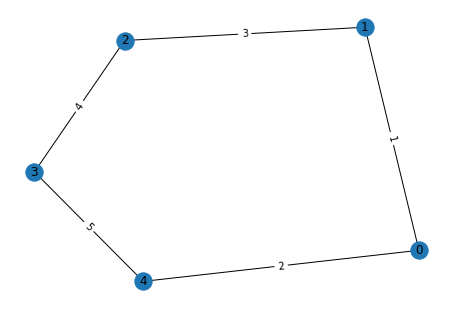

In [63]:
W  = nx.cycle_graph(5)
for i, (u, v) in enumerate(W.edges(), 1):
    W[u][v]['weight'] = i
pos = nx.fruchterman_reingold_layout(W)
nx.draw(W, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(W, pos, edge_labels=nx.get_edge_attributes(W, 'weight'))